# Additional QC Plots

There are some addition QC plots that I want to generate and add to the QC analysis.

In [98]:
# Imports
import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb

# Setup notebook
nbconfig = Nb.setup_notebook()

# Turn on cache
from joblib import Memory
memory = Memory(cachedir=nbconfig.cache, verbose=0)

last updated: 2018-01-17 
Git hash: 5ee6cb6c372498a1de64a8d5f049beee27d1576a


## Distribution of library size by cluster

In [99]:
# Cluster
clusters = pd.read_csv('../output/testis_clusters.tsv', sep='\t', index_col=0, header=None, names=['cell', 'cluster']).cluster
clusters.head()

cell
AAACCTGGTTCATGGT    4
AAACGGGAGACTGGGT    6
AAACGGGGTGTTAAGA    1
AAAGATGAGTATCGAA    6
AAAGCAAGTCTAGGTT    3
Name: cluster, dtype: int64

In [112]:
# raw counts
raw = pd.read_csv('../output/testes_scRNAseq_pilot/raw.tsv', sep='\t')
raw_cnts = raw.sum()
raw_cnts.name = 'raw_cnts'

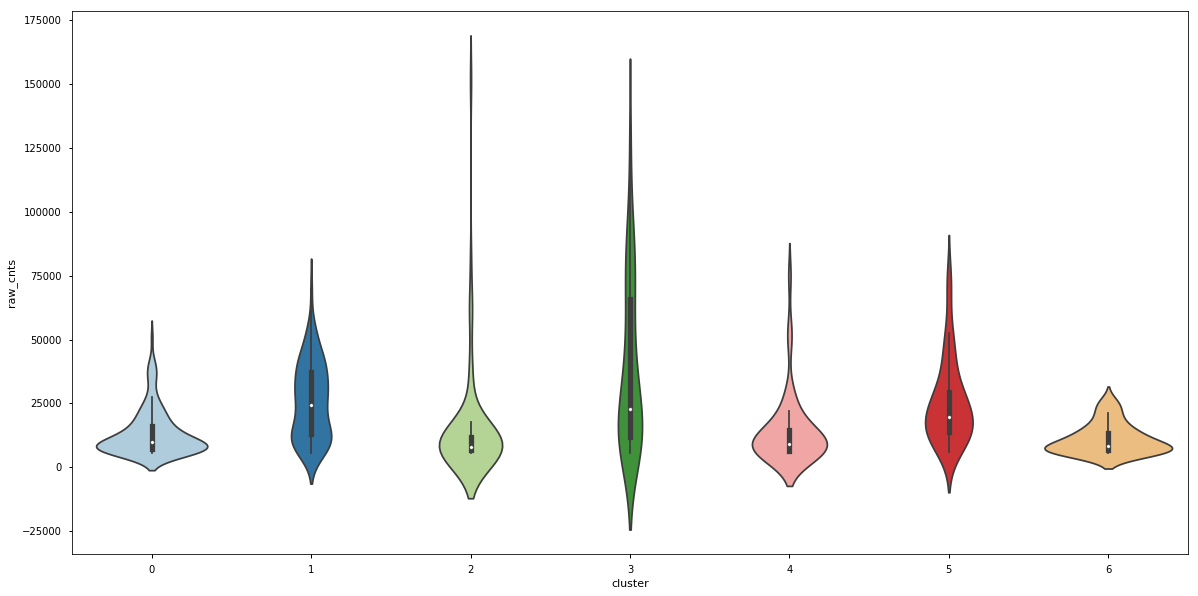

In [133]:
dat = pd.concat([raw_cnts, clusters], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.violinplot(dat.cluster, dat.raw_cnts)

labels = []
for l in ax.get_xticklabels():
    orig = l.get_text().split('.')[0]
    l.set_text(f'{orig}')
    labels.append(l)

ax.set_xticklabels(labels);

## Expressed genes by cluster

In [102]:
norm = pd.read_csv('../output/testes_scRNAseq_pilot/normalized_read_counts.tsv', sep='\t')
norm.head()

,AAACCTGGTTCATGGT,AAACGGGAGACTGGGT,AAACGGGGTGTTAAGA,AAAGATGAGTATCGAA,AAAGCAAGTCTAGGTT,AAATGCCGTAAAGGAG,AACCATGCAGTACACT,AACCGCGCAGCGTCCA,AACGTTGAGTACCGGA,AACTCAGAGAGTAATC,...,TTGGAACAGCGATAGC,TTGGAACCAGTGGGAT,TTGGCAAGTTATTCTC,TTGGCAATCACAATGC,TTGGCAATCCTTCAAT,TTTATGCAGGAGTCTG,TTTGGTTAGGTACTCT,TTTGGTTTCGTTGACA,TTTGTCAAGAGTAAGG,TTTGTCAAGCGTCAAG
FBgn0031081,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000
FBgn0031085,1.426971,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.231911,2.459014,0.0,0.000000,0.0,0.0,1.011521,0.0,0.11752,0.000000
FBgn0040784,1.749042,0.0,0.0,0.0,1.464034,0.0,0.0,0.0,0.0,0.0,...,1.535072,0.000000,0.0,1.787467,0.0,0.0,0.000000,0.0,0.00000,0.643912
FBgn0031086,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.244004,0.0,0.0,0.000000,0.0,0.00000,0.000000
FBgn0031082,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.231911,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000


In [103]:
exp_cnts = (norm > 3).sum()
exp_cnts.name = 'exp_cnts'

In [104]:
dat = pd.concat([exp_cnts, clusters], axis=1)
dat.head()

,exp_cnts,cluster
cell,,
AAACCTGGTTCATGGT,62,4
AAACGGGAGACTGGGT,99,6
AAACGGGGTGTTAAGA,105,1
AAAGATGAGTATCGAA,109,6
AAAGCAAGTCTAGGTT,106,3


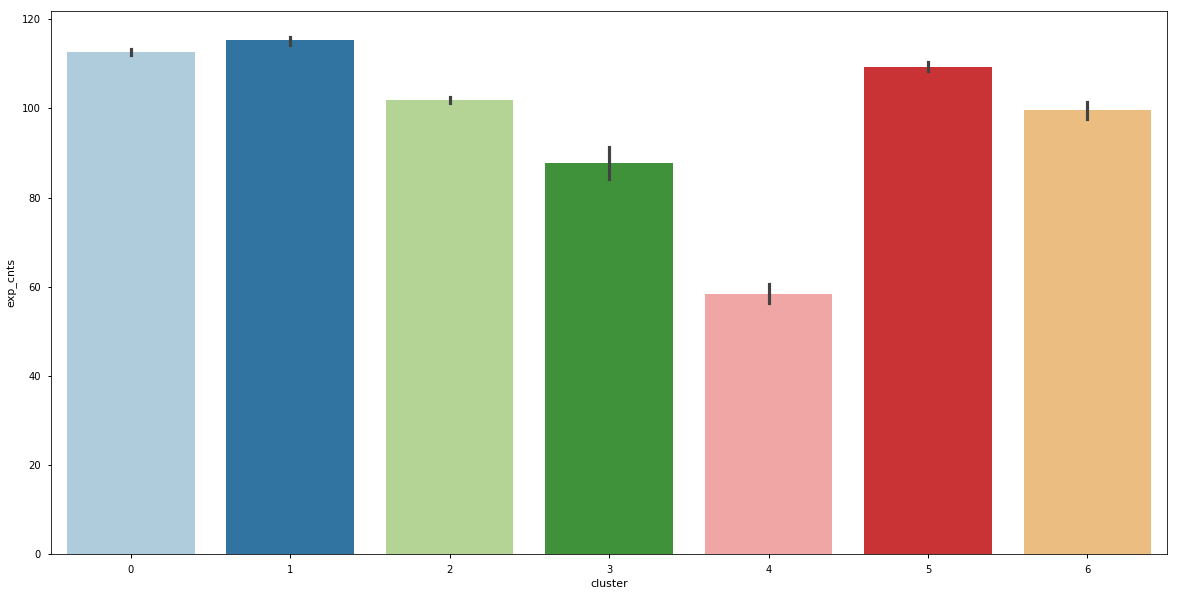

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=dat.cluster, y=dat.exp_cnts, ci=68)

## Mitochondrial gene counts by cluster

* Look map FBGN to mito
* Pull out FBGN from norm and make the above bar chart

In [106]:
import gffutils

In [ ]:
db = gffutils.FeatureDB(os.path.join(os.environ['REFERENCES_DIR'], 'dmel/r6-16/gtf/dmel_r6-16.gtf.db'))

onM = []
for gene in db.features_of_type('gene'):
    if gene.chrom == 'chrM':
        onM.append(gene.id)

onM = sorted(onM)

In [109]:
mito_cnts = (norm[norm.index.isin(onM)] > 3).sum()
mito_cnts.name = 'mito_cnts'

In [110]:
dat = pd.concat([mito_cnts, clusters], axis=1)

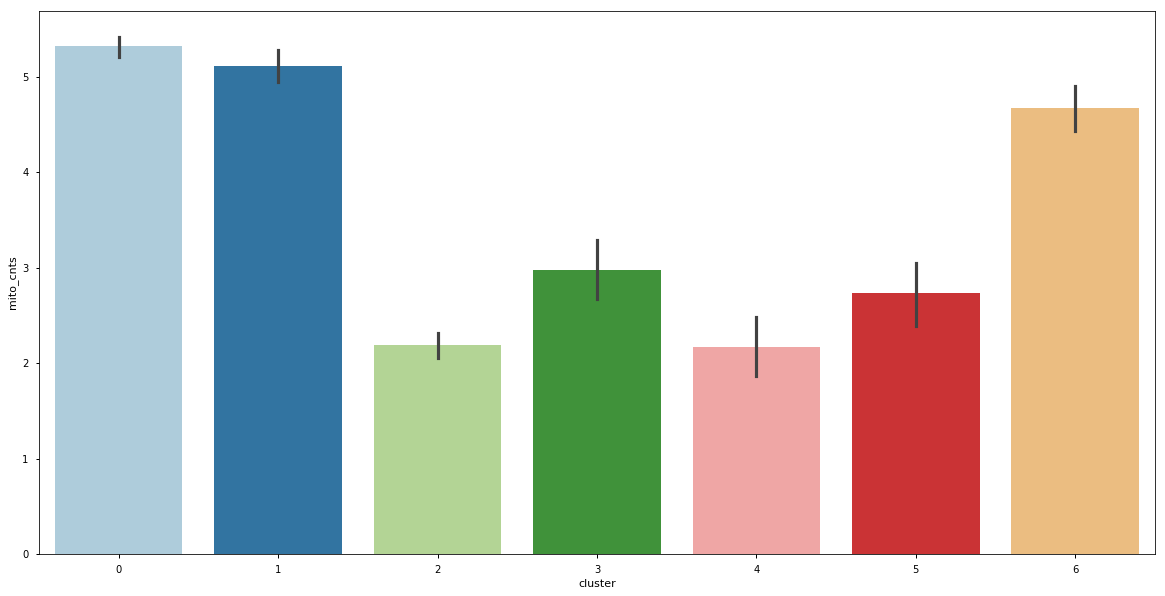

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x=dat.cluster, y=dat.mito_cnts, ci=68)